In [222]:
from io import StringIO
import requests

In [223]:
url="https://raw.githubusercontent.com/Md-Maruf-1727/Machine-Learning-Algorithms/refs/heads/main/K%20Nearest%20Neighbors%20(KNN)/Subscription%20Upgrade%20Prediction/subscription_upgrade.csv"

In [224]:
data=requests.get(url)

In [225]:
response_text=data.text

In [226]:
text=StringIO(response_text)

In [227]:
import pandas as pd

In [228]:
df=pd.read_csv(text)

In [229]:
df.head()

,id,age,country,device_type,daily_usage_minutes,ads_clicked,watch_time,free_features_used,days_since_signup,last_payment_amount,is_active,support_tickets,upgrade
0,1.0,50.0,BD,Tablet,-10.0,5.0,7.743246,1.0,60.0,NaN,1.0,NaN,1.0
1,2.0,35.0,NaN,NaN,5.0,20.0,1.697019,8.0,300.0,50.0,NaN,10.0,1.0
2,3.0,60.0,US,NaN,60.0,10.0,2.365983,2.0,60.0,100.0,NaN,NaN,1.0
3,NaN,40.0,PK,NaN,20.0,2.0,9.538726,1.0,1.0,0.0,NaN,NaN,0.0
4,5.0,50.0,US,NaN,30.0,10.0,2.167170,8.0,300.0,5.0,NaN,10.0,0.0


In [230]:
df.isna().sum()

,0
id,52
age,158
country,319
device_type,259
daily_usage_minutes,168
ads_clicked,200
watch_time,52
free_features_used,190
days_since_signup,164
last_payment_amount,196


In [231]:
df=df.drop(["id","support_tickets"],axis=1)

In [232]:
df.head()

,age,country,device_type,daily_usage_minutes,ads_clicked,watch_time,free_features_used,days_since_signup,last_payment_amount,is_active,upgrade
0,50.0,BD,Tablet,-10.0,5.0,7.743246,1.0,60.0,NaN,1.0,1.0
1,35.0,NaN,NaN,5.0,20.0,1.697019,8.0,300.0,50.0,NaN,1.0
2,60.0,US,NaN,60.0,10.0,2.365983,2.0,60.0,100.0,NaN,1.0
3,40.0,PK,NaN,20.0,2.0,9.538726,1.0,1.0,0.0,NaN,0.0
4,50.0,US,NaN,30.0,10.0,2.167170,8.0,300.0,5.0,NaN,0.0


In [233]:
df["age"]=df["age"].mean()

In [234]:
df.isna().sum()

,0
age,0
country,319
device_type,259
daily_usage_minutes,168
ads_clicked,200
watch_time,52
free_features_used,190
days_since_signup,164
last_payment_amount,196
is_active,368


In [235]:
df["country"]=df["country"].ffill()

In [236]:
df.isna().sum()

,0
age,0
country,0
device_type,259
daily_usage_minutes,168
ads_clicked,200
watch_time,52
free_features_used,190
days_since_signup,164
last_payment_amount,196
is_active,368


In [237]:
df["device_type"].value_counts()

,count
device_type,
Tablet,216
iOS,204
Android,190
Web,171


In [238]:
df["device_type"]=df["device_type"].bfill()

In [239]:
df.isna().sum()

,0
age,0
country,0
device_type,0
daily_usage_minutes,168
ads_clicked,200
watch_time,52
free_features_used,190
days_since_signup,164
last_payment_amount,196
is_active,368


In [240]:
df["daily_usage_minutes"]=df["daily_usage_minutes"].mean()

In [241]:
df["ads_clicked"]=df["ads_clicked"].mean()

In [242]:
df["ads_clicked"]=df["ads_clicked"].mean()

In [243]:
df["free_features_used"]=df["free_features_used"].mean()

In [244]:
df["days_since_signup"]=df["days_since_signup"].mean()

In [245]:
df["last_payment_amount"]=df["last_payment_amount"].mean()

In [246]:
df["is_active"]=df["is_active"].mean()

In [247]:
df=df.drop(["upgrade"],axis=1)

In [248]:
df.isna().sum()

,0
age,0
country,0
device_type,0
daily_usage_minutes,0
ads_clicked,0
watch_time,52
free_features_used,0
days_since_signup,0
last_payment_amount,0
is_active,0


In [249]:
df["watch_time"]=df["watch_time"].mean()

In [250]:
df.shape

(1040, 10)

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

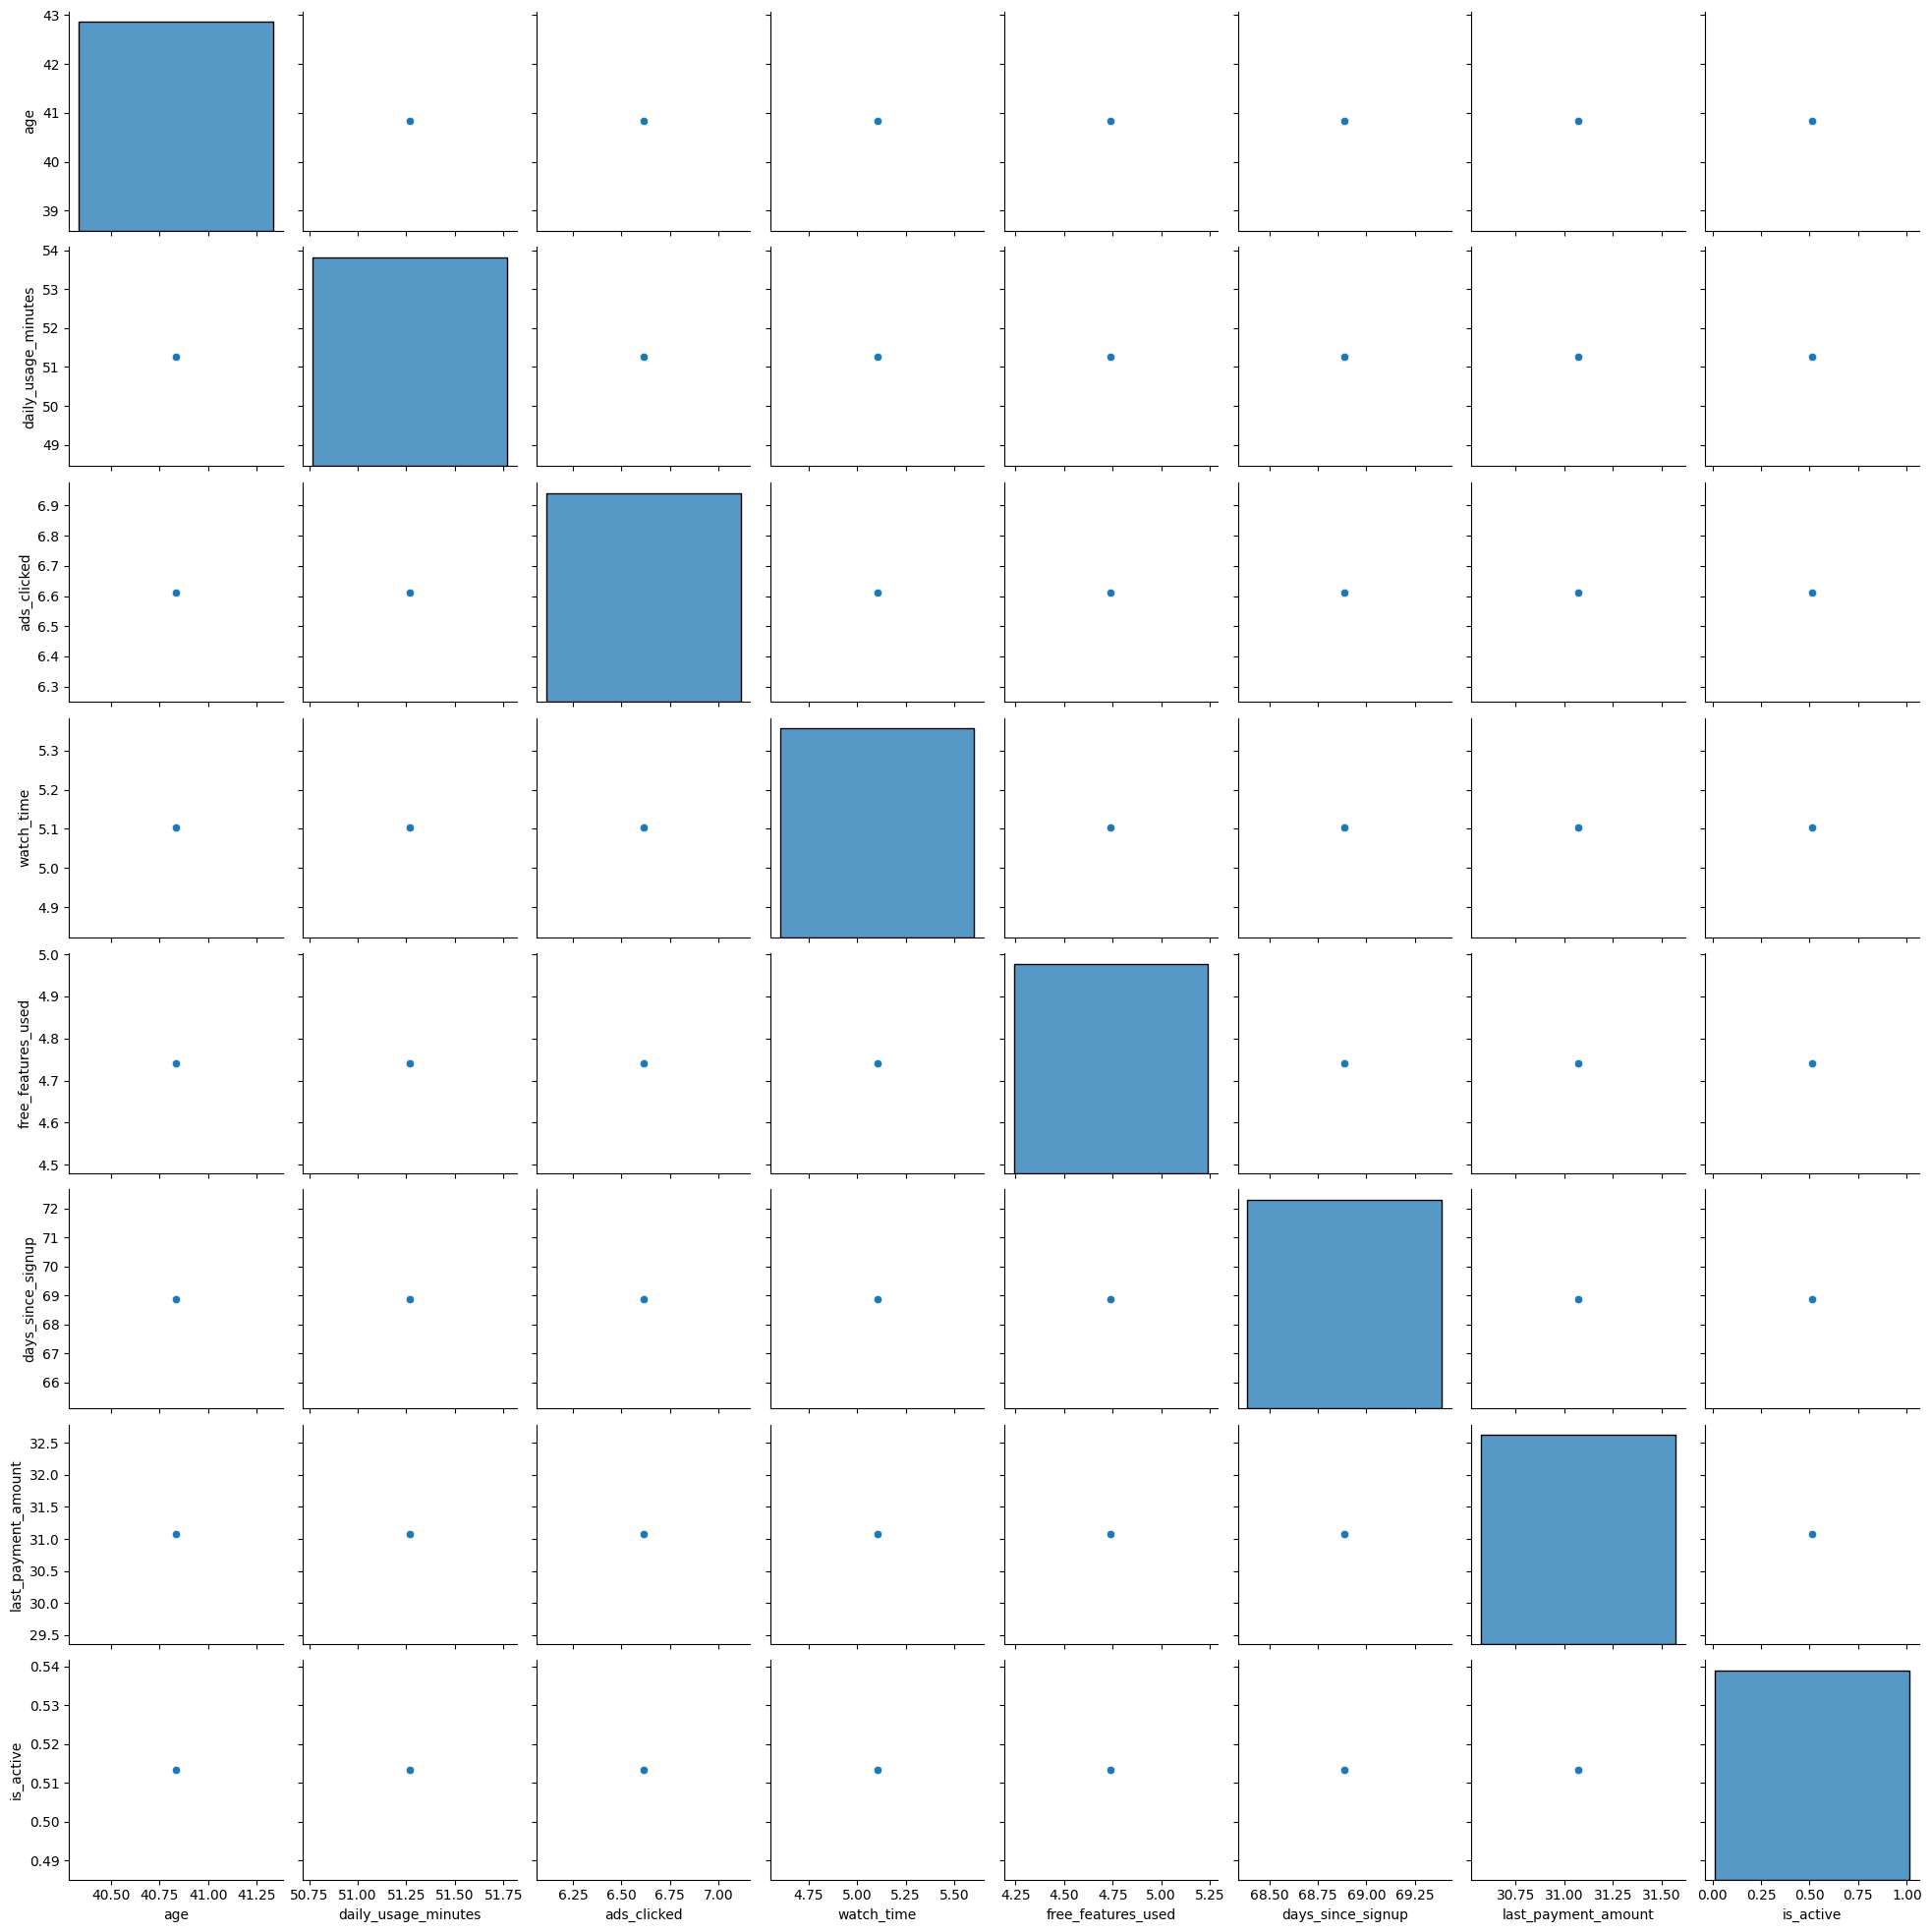

In [252]:
sns.pairplot(df)

In [253]:
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [254]:
for col in df.columns:
  if not is_numeric_dtype(df[col]):
    df[col] = le.fit_transform(df[col])

In [255]:
df.head()

,age,country,device_type,daily_usage_minutes,ads_clicked,watch_time,free_features_used,days_since_signup,last_payment_amount,is_active
0,40.833333,0,1,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393
1,40.833333,0,0,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393
2,40.833333,4,0,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393
3,40.833333,2,0,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393
4,40.833333,4,0,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393


<Axes: >

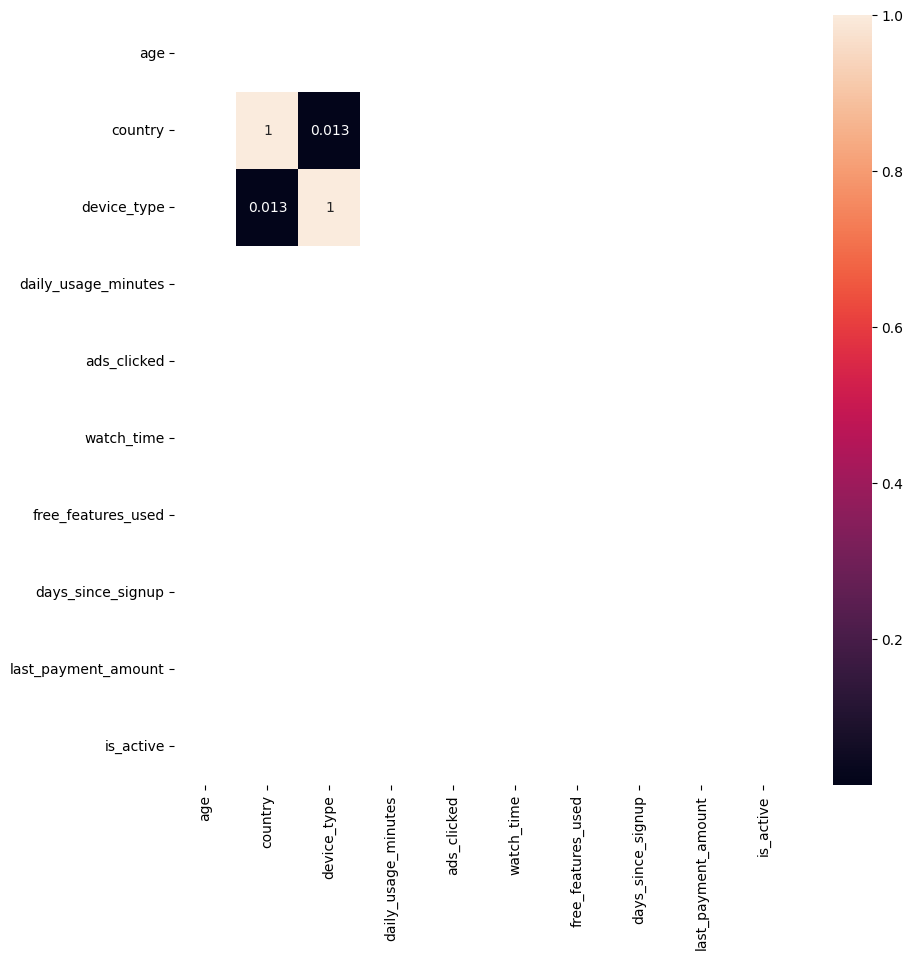

In [256]:

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")

In [257]:
df.head()

,age,country,device_type,daily_usage_minutes,ads_clicked,watch_time,free_features_used,days_since_signup,last_payment_amount,is_active
0,40.833333,0,1,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393
1,40.833333,0,0,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393
2,40.833333,4,0,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393
3,40.833333,2,0,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393
4,40.833333,4,0,51.267202,6.613095,5.103169,4.741176,68.888128,31.072275,0.513393


In [ ]:
x=df.drop(["last_payment_amount"],axis=1)
y=df[["last_payment_amount"]]

In [261]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [262]:
models={"Linear":LinearRegression(),
"Ridge":Ridge(),
        "Lasso":Lasso()}

In [263]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for model_name, model in models.items():
    print("model name is:", model_name)

    # Train the model
    model1 = model.fit(x, y)

    # Train score
    print("train score:")
    print(model1.score(x, y))

    # Prediction on training data
    pred = model1.predict(x)

    # MAE calculation
    mae = mean_absolute_error(y, pred)
    print("MAE (Mean Absolute Error):", mae)

    # MSE calculation
    mse = mean_squared_error(y, pred)
    print("MSE (Mean Squared Error):", mse)

    # R2 score (accuracy)
    accuracy = r2_score(y, pred)
    print("R2 Score (Accuracy):", accuracy)

    print("<.............................................>")


model name is: Linear
train score:
0.0
MAE (Mean Absolute Error): 3.552713678800501e-15
MSE (Mean Squared Error): 1.262177448353619e-29
R2 Score (Accuracy): 0.0
<.............................................>
model name is: Ridge
train score:
0.0
MAE (Mean Absolute Error): 3.552713678800501e-15
MSE (Mean Squared Error): 1.262177448353619e-29
R2 Score (Accuracy): 0.0
<.............................................>
model name is: Lasso
train score:
0.0
MAE (Mean Absolute Error): 3.552713678800501e-15
MSE (Mean Squared Error): 1.262177448353619e-29
R2 Score (Accuracy): 0.0
<.............................................>
